In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Data=pd.read_csv(r"https://raw.githubusercontent.com/Ish20S/GRIP-THE-SPARK-FOUNDATION/master/Task%203/SampleSuperstore.csv?token=AVPCLNOY4KA4AIXWFNEJFJDBKRVBW")
Data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
Data.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
Data.shape

(9994, 13)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
Data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
for i in Data.columns:
    print(i,len(Data[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [ ]:
Data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

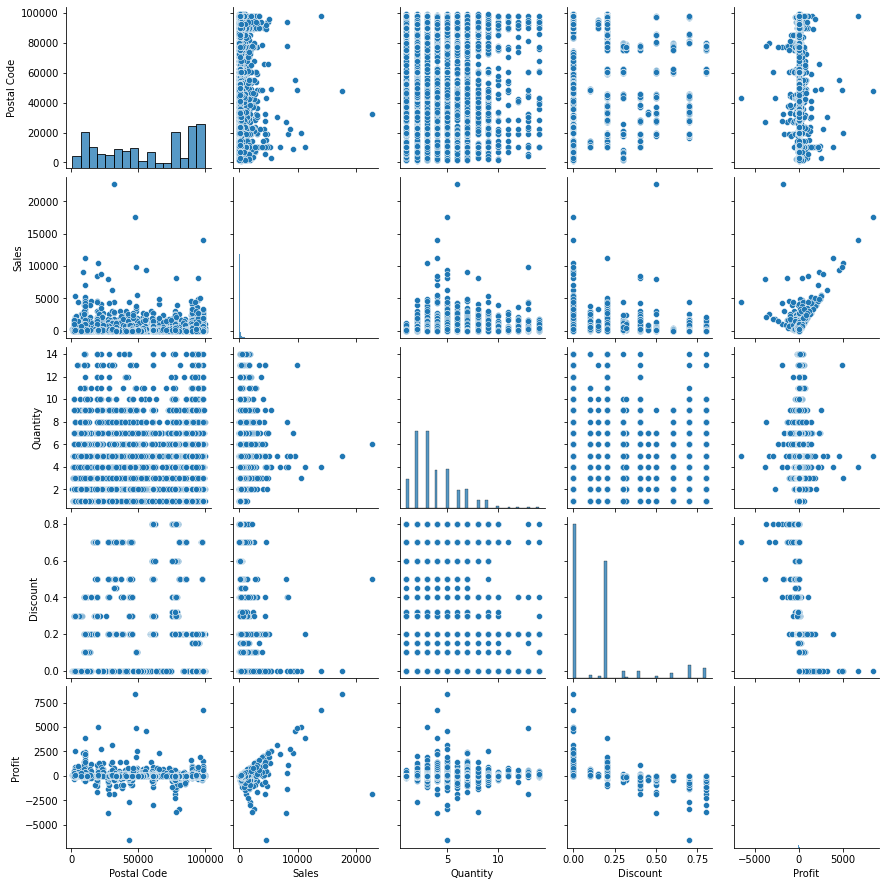

In [ ]:
sns.pairplot(Data)

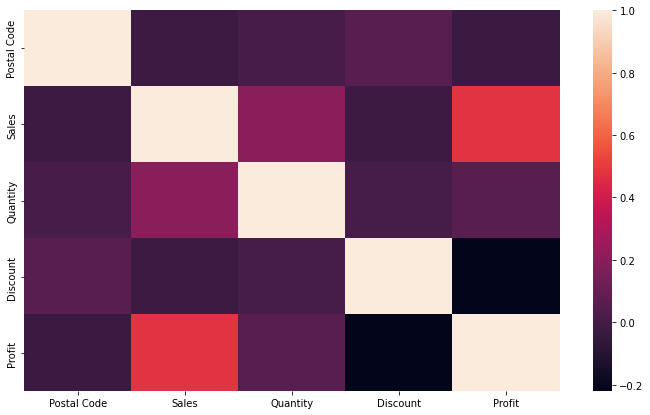

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(12,7))
sns.heatmap(Data.corr())
plt.show()

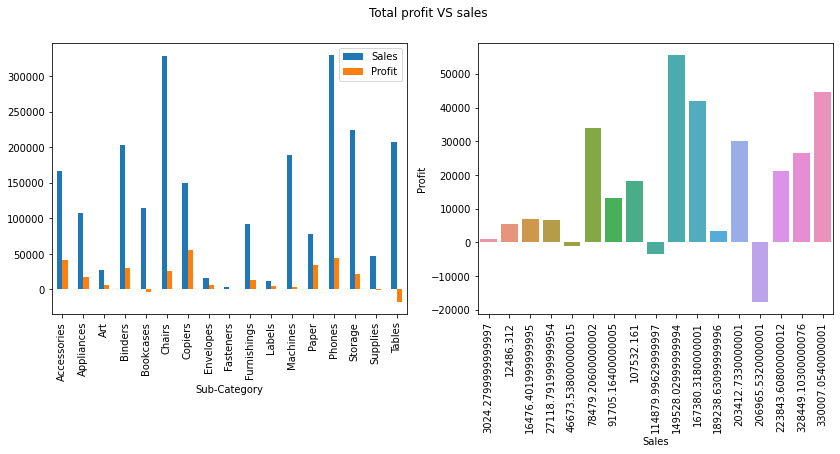

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
fig.suptitle("Total profit VS sales ")
sns.barplot(data=Data.groupby('Sub-Category')['Sales','Profit'].agg(sum),x='Sales',y='Profit',ax=axes[1])
Data.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

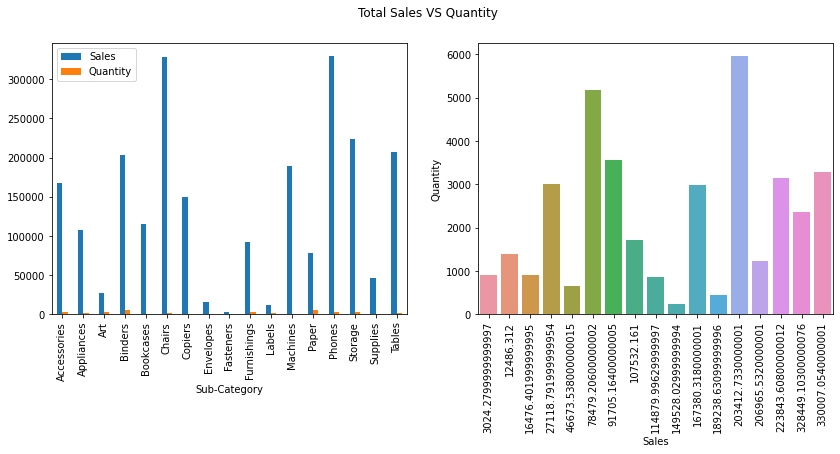

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
fig.suptitle("Total Sales VS Quantity ")
sns.barplot(data=Data.groupby('Sub-Category')['Sales','Quantity'].agg(sum),x='Sales',y='Quantity',ax=axes[1])
Data.groupby('Sub-Category')['Sales','Quantity'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

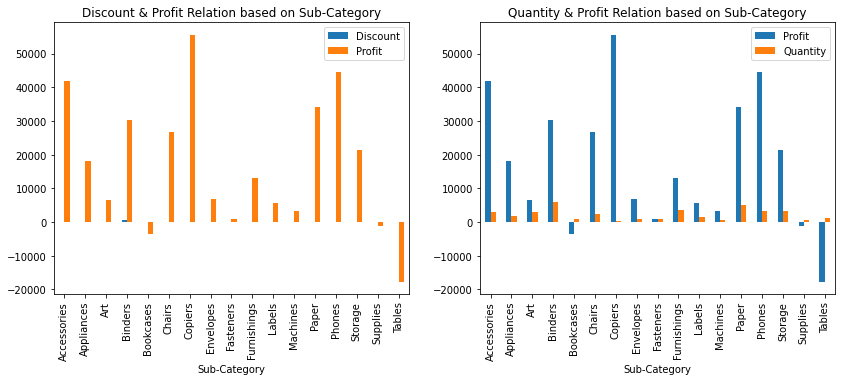

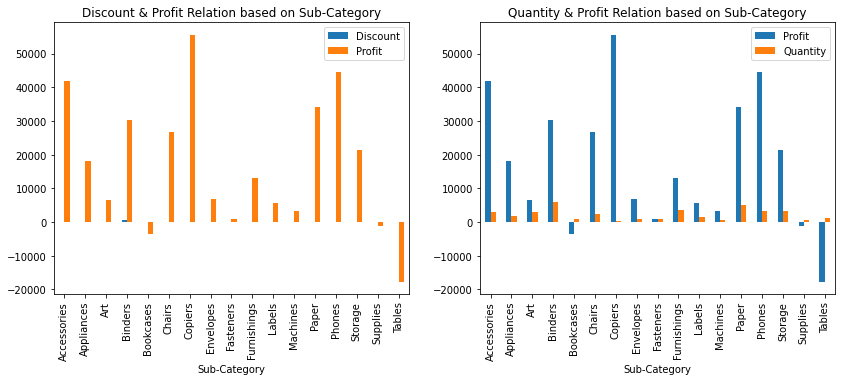

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
Data.groupby('Sub-Category')['Discount','Profit'].agg(sum).plot(kind='bar',ax=axes[0]).set_title('Discount & Profit Relation based on Sub-Category')
Data.groupby('Sub-Category')['Profit','Quantity'].agg(sum).plot(kind='bar',ax=axes[1]).set_title('Quantity & Profit Relation based on Sub-Category')
plt.xticks(rotation=90)
plt.show()

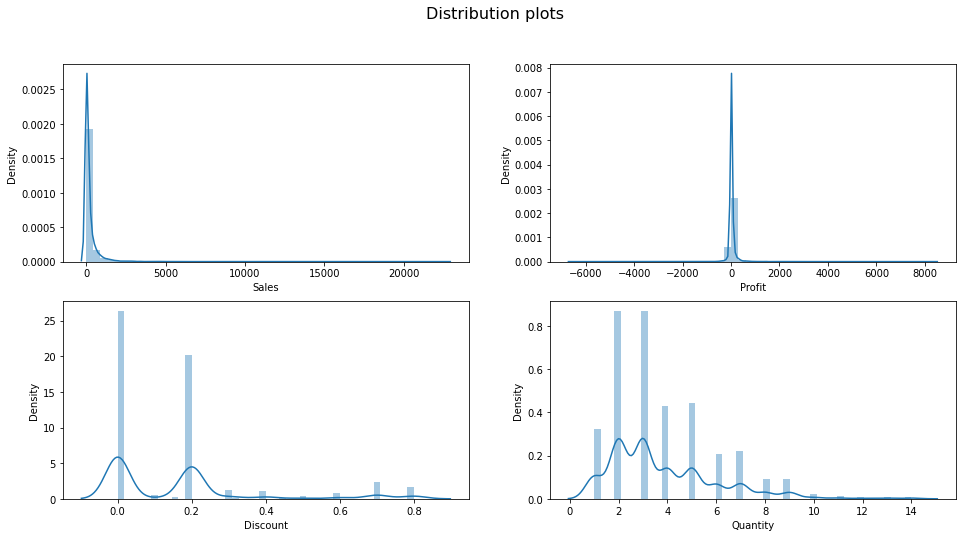

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Distribution plots", fontsize=16)
sns.distplot(Data['Sales'],ax=axes[0,0])
sns.distplot(Data['Profit'],ax=axes[0,1])
sns.distplot(Data['Discount'],ax=axes[1,0])
sns.distplot(Data['Quantity'],ax=axes[1,1])
plt.show()

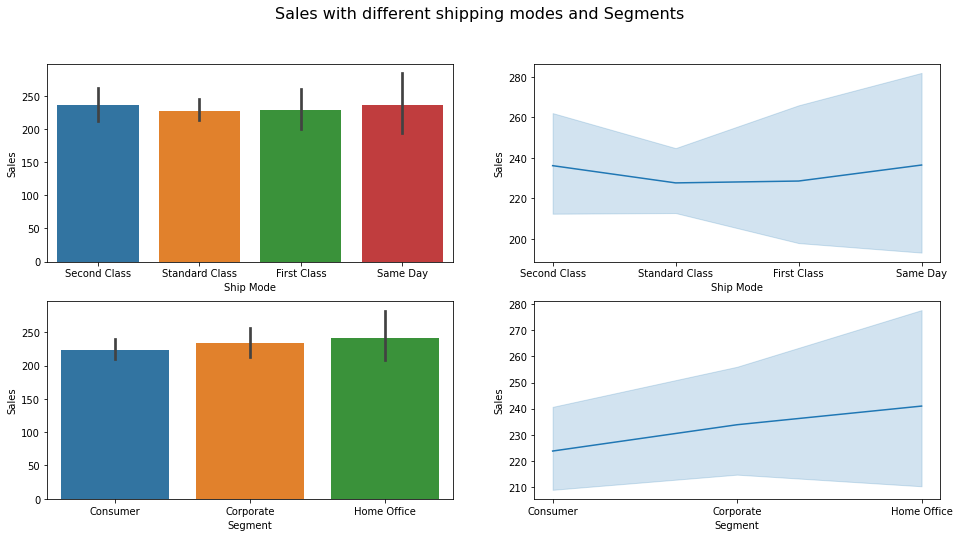

In [20]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Sales with different shipping modes and Segments", fontsize=16)
sns.barplot(Data['Ship Mode'],Data['Sales'],ax=axes[0,0])
sns.lineplot(Data['Ship Mode'],Data['Sales'],ax=axes[0,1])
sns.barplot(Data['Segment'],Data['Sales'],ax=axes[1,0])
sns.lineplot(Data['Segment'],Data['Sales'],ax=axes[1,1])
plt.show()

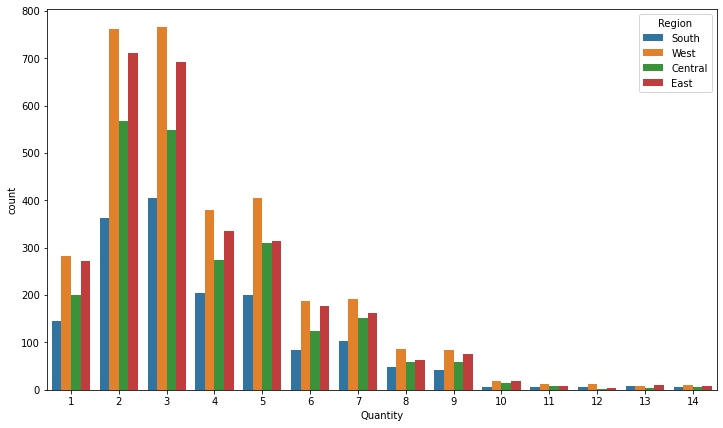

In [21]:
fig,ax= plt.subplots(1,1,figsize=(12,7))
sns.countplot(Data['Quantity'],hue=Data['Region'])
plt.show()